<a href="https://colab.research.google.com/github/Mauroleao/AulaGitHubApresentacao/blob/master/DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montar uma imagem apartir do Google Drive, para usar como diretório.
import os

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Importando a Bibliotéca 'Pandas' e Importando o arquivo'CSV' através do diretório criado no 'Gdrive'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ebt = pd.read_csv('/content/gdrive/MyDrive/MAPA/EBT_MAPA.csv')

In [ ]:
# 5. Crie um objeto com os dados da Unidade da Federação em que você mora.
filtro_Regiao = ebt[ebt['nome_uf']=='Sao Paulo']
#Testando a Conexão
filtro_Regiao

In [ ]:
# (questão 6) 6. Quantos municípios foram registrados no seu estado?
quant_muni_esta = ebt[ebt['municipio']=='Sao Paulo']

print(quant_muni_esta.size)

39


In [ ]:
# (questão 7) 7. Quantos municípios foram registrados no país?
quant_muni_pais = ebt['municipio']
print(quant_muni_pais.count())




4488


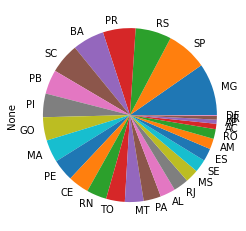

In [ ]:
# 8. Faça um gráfico de setores da quantidade de municípios de cada estado.
ebt[['municipio', 'uf']].value_counts('uf').plot.pie()


In [ ]:
# 9. A coluna "posicao_ebt" mostra a escala de transparência do município.
#Crie um objeto "posicao" contendo as colunas "posicao_ebt" e "municipio",
#deixe ordenado de forma crescente pela escala de transparência do município.
posicao =ebt[['municipio','posicao_ebt' ]].sort_values('posicao_ebt')
posicao




,municipio,posicao_ebt
0,Apiuna,1
2125,Tiete,1
2124,Conceicao da Barra,1
2123,Cariacica,1
2122,Alfredo Chaves,1
...,...,...
4113,Goianinha,1848
4114,Sebastiao Leal,1848
4115,Caraubas,1848
4109,Espirito Santo,1848


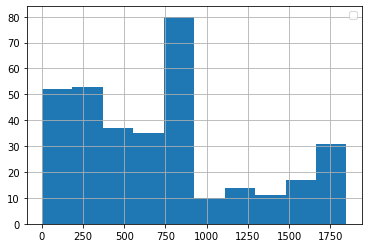

In [ ]:
# 10. Faça um histograma com base na escala de transparência dos municípios do seu estado.
%matplotlib inline
histo_tranparencia = filtro_Regiao['posicao_ebt']
histo_tranparencia.hist()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

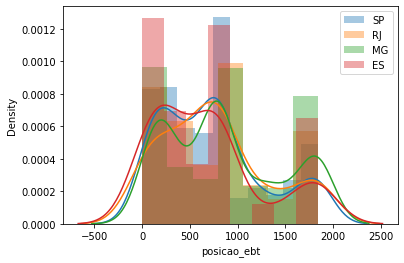

In [ ]:
# 11. Utilize um distplot, que combina os gráficos histograma e kde para mostrar na região do país em que mora, em pelo menos 3
#estados, a escala de transparência dos municípios.

sns.distplot(ebt[ebt['uf'] == 'SP']
            ['posicao_ebt'].dropna(), label='SP')

sns.distplot(ebt[ebt['uf'] == 'RJ']
            ['posicao_ebt'].dropna(), label='RJ')

sns.distplot(ebt[ebt['uf'] == 'MG']
            ['posicao_ebt'].dropna(), label='MG')

sns.distplot(ebt[ebt['uf'] == 'ES']
            ['posicao_ebt'].dropna(), label='ES')


plt.legend()

In [ ]:
# 12. Retorne a mediana, média, valor máximo e valor
# mínimo com base na escala de transparência dos municípios do seu estado.
medias = ebt['posicao_ebt']
medias.dropna(inplace=True)
print("Minimo :", medias.min())
print("Maximo :", medias.max())
print("Media :", medias.mean())
print("Mediana : %.3f" % (medias.median()))
print("Desvio Padrao :", medias.std())

Minimo : 1
Maximo : 1848
Media : 784.2974598930481
Mediana : 799.000
Desvio Padrao : 569.8969804132706


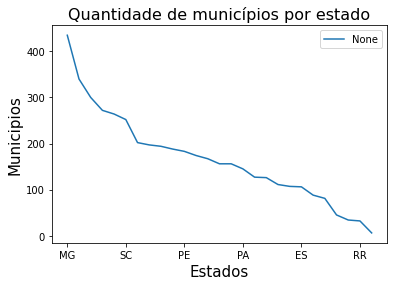

In [ ]:
#13. Crie um gráfico de linha com os dados retornados na etapa 7.
ebt[['municipio','uf']].value_counts('uf').plot()
plt.title("Quantidade de municípios por estado", loc="center", fontsize=16)
#plt.figure(figsize=(12,30))
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Municipios', fontsize=15)
plt.legend()



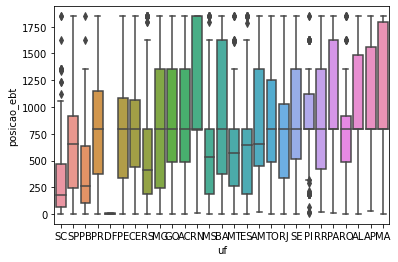

In [ ]:
# 14. Crie um gráfico do tipo boxplot com a escala de transparência de cada estado.
posicao =ebt['uf'],['posicao_ebt' ]
sns.boxplot(x='uf',
           y='posicao_ebt',
            data=ebt)



Text(0.5, 1.0, 'Escala Transparência Por Estado')

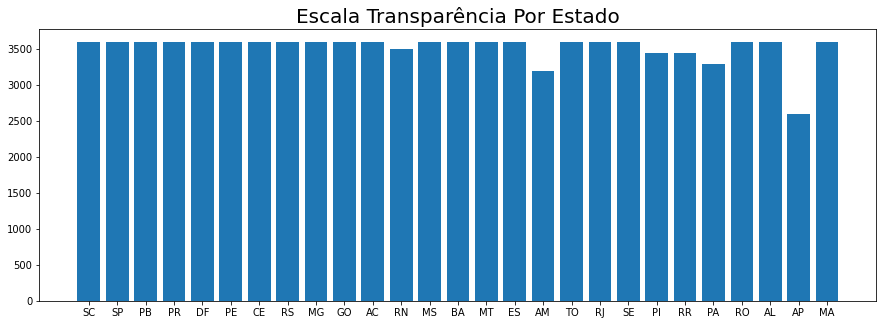

In [ ]:
# 15. Faça um gráfico de barras comparando o total de pontos obtidos por estado.

plt.figure(figsize=(15, 5))
plt.bar(ebt['uf'], ebt['total_pontos'])
plt.title('Escala Transparência Por Estado', fontsize=20)

